In [ ]:
import sys
!{sys.executable} -m pip install numpy matplotlib pandas

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import pandas as pd

In [218]:
bm_mergesort = pd.read_csv('benchmark_MergeSort.csv', sep=';')
bm_quicksort = pd.read_csv('benchmark_QuickSort.csv', sep=';')
bm_treesort = pd.read_csv('benchmark_TreeSort.csv', sep=';')

colunas = ['Tamanho', 'Aleatorio_Tempo', 'Aleatorio_Comparacoes', 'Aleatorio_Trocas', 'Crescente_Tempo', 'Crescente_Comparacoes', 'Crescente_Trocas', 'Decrescente_Tempo', 'Decrescente_Comparacoes', 'Decrescente_Trocas', 'Quase_ordenado_Tempo', 'Quase_ordenado_Comparacoes', 'Quase_ordenado_Trocas']

bm_mergesort.columns = colunas
bm_quicksort.columns = colunas
bm_treesort.columns = colunas

bm_treesort

,Tamanho,Aleatorio_Tempo,Aleatorio_Comparacoes,Aleatorio_Trocas,Crescente_Tempo,Crescente_Comparacoes,Crescente_Trocas,Decrescente_Tempo,Decrescente_Comparacoes,Decrescente_Trocas,Quase_ordenado_Tempo,Quase_ordenado_Comparacoes,Quase_ordenado_Trocas
0,1000,1.0,2480,1000,2.0,1000.0,1000.0,2.0,1999.0,1000.0,2.4,1000.0,1000.0
1,10000,2.2,25232,10000,175.0,10000.0,10000.0,151.0,19999.0,10000.0,179.4,10000.0,10000.0
2,100000,33.4,272155,100000,23168.0,100000.0,100000.0,23141.0,199999.0,100000.0,23045.6,100000.0,100000.0
3,1000000,3425.6,2967139,1000000,2814170.0,1000000.0,1000000.0,3956050.0,1999999.0,1000000.0,3911844.2,1199999.0,1000000.0
4,10000000,177293.0,29966598,10000000,inf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Gráfico de linha - Aleatório Tempo (ms)

In [ ]:
def create_dataset(column : str):

    df = pd.DataFrame()
    df['Tamanho'] = bm_mergesort['Tamanho']
    df['MergeSort'] = bm_mergesort[column]
    df['QuickSort'] = bm_quicksort[column]
    df['TreeSort'] = bm_treesort[column]
    df = df.set_index('Tamanho')

    return df

def format_number(value, _):
    if value >= 1000000:
        return f'{value / 1000000:.1f}M'
    elif value >= 1000:
        return f'{value / 1000:.1f}k'
    else:
        return str(value)

def plot_data_time(df: pd.DataFrame, title, ylabel):

    def ms_to_human(x, _):
        if x >= 3_600_000:
            return f"{x/3_600_000:.1f}h"
        elif x >= 60_000:
            return f"{x/60_000:.1f}min"
        elif x >= 1_000:
            return f"{x/1_000:.1f}s"
        else:
            return f"{x:.0f} ms"
        
    plt.figure(figsize=(10, 5))
    plt.plot(df.index,df['MergeSort'], label='MergeSort', marker='o')
    plt.plot(df.index,df['QuickSort'], label='QuickSort', marker='o')
    plt.plot(df.index,df['TreeSort'], label='TreeSort', marker='o')
    plt.title(title)
    plt.xlabel('Tamanho do vetor')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    
    
    # plt.xscale('log')
    ax = plt.gca()
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(ms_to_human))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))

    plt.show()
    

    
    
create_dataset('Crescente_Tempo')

,MergeSort,QuickSort,TreeSort
Tamanho,,,
1000,1.0,1.0,2.0
10000,4.0,1.0,175.0
100000,31.0,5.0,23168.0
1000000,362.0,93.0,2814170.0
10000000,3886.0,392.0,inf


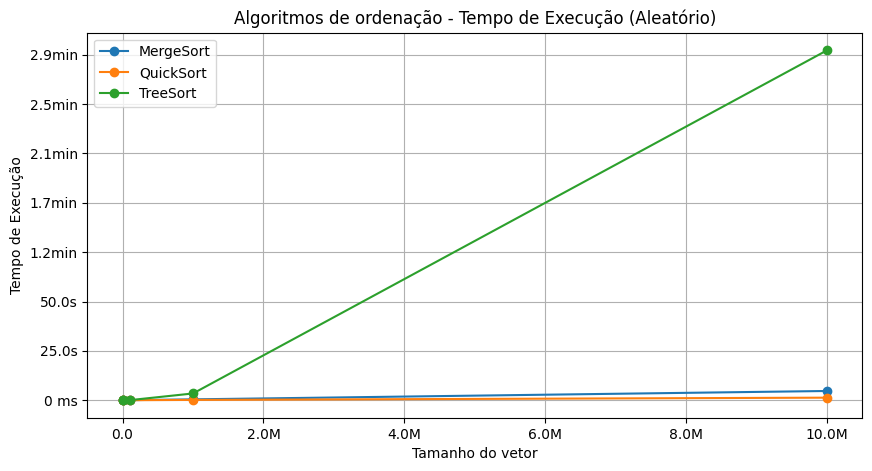

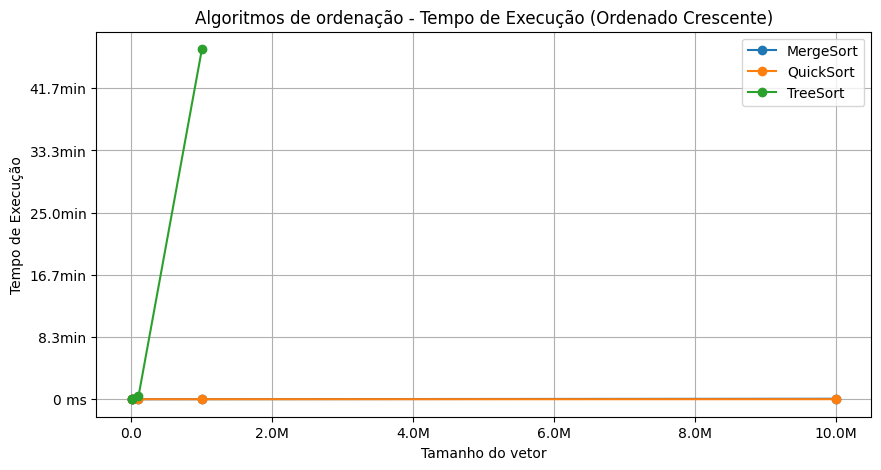

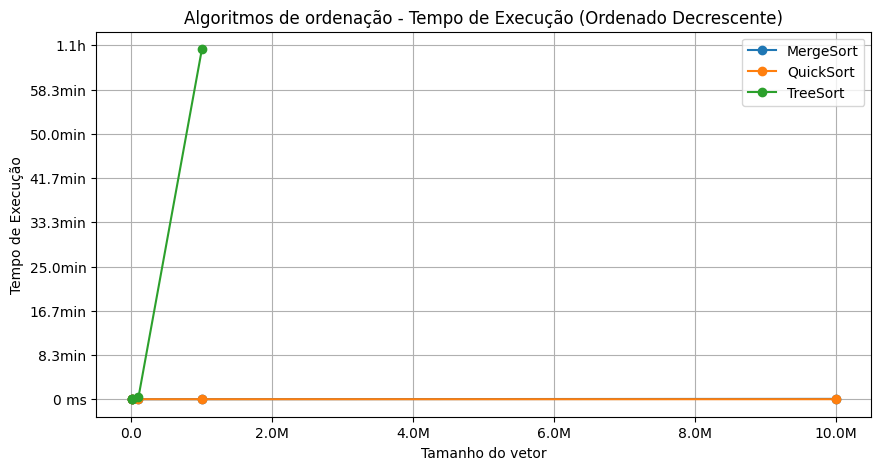

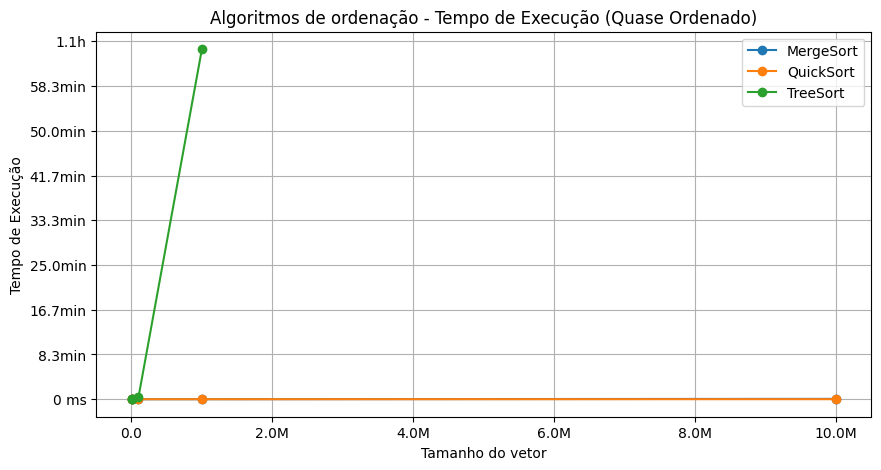

In [230]:
plot_data_time(create_dataset('Aleatorio_Tempo'), 'Algoritmos de ordenação - Tempo de Execução (Aleatório)', 'Tempo de Execução')
plot_data_time(create_dataset('Crescente_Tempo'), 'Algoritmos de ordenação - Tempo de Execução (Ordenado Crescente)', 'Tempo de Execução')
plot_data_time(create_dataset('Decrescente_Tempo'), 'Algoritmos de ordenação - Tempo de Execução (Ordenado Decrescente)', 'Tempo de Execução')
plot_data_time(create_dataset('Quase_ordenado_Tempo'), 'Algoritmos de ordenação - Tempo de Execução (Quase Ordenado)', 'Tempo de Execução')

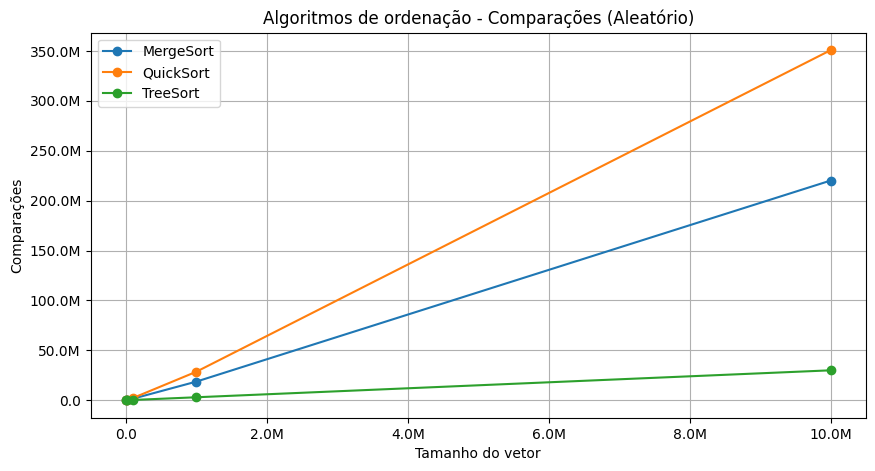

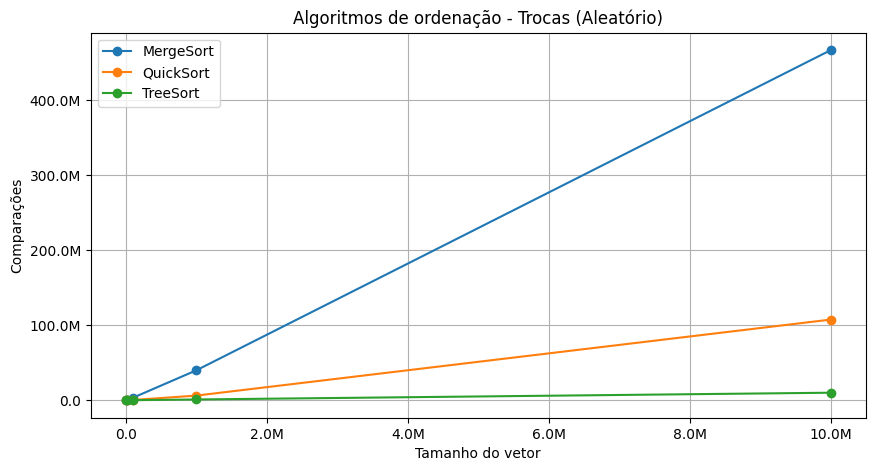

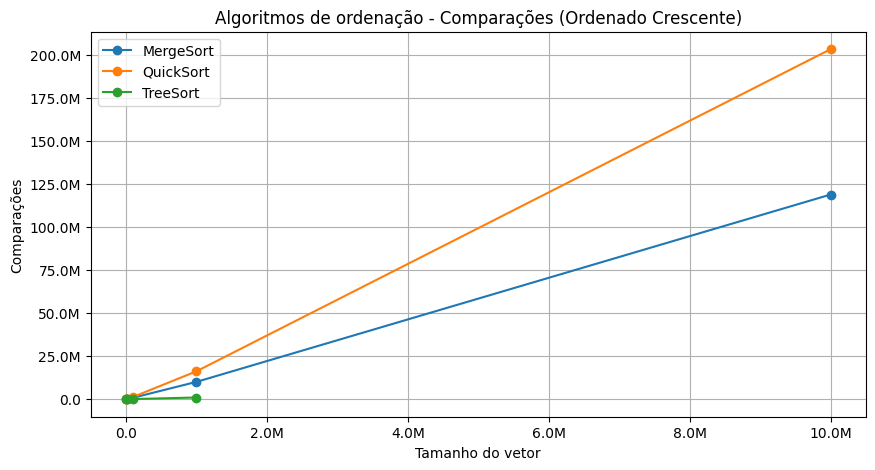

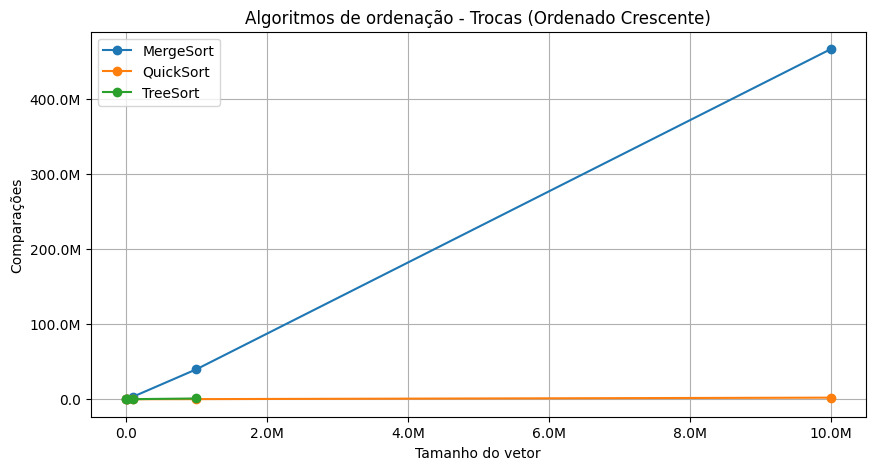

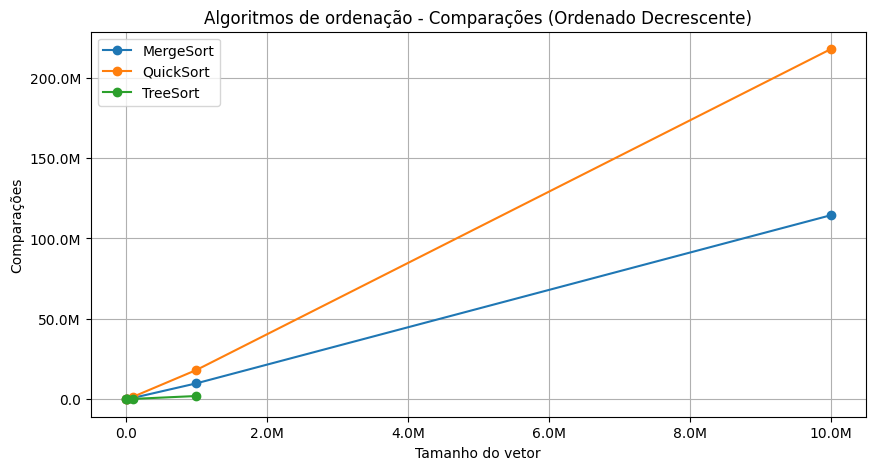

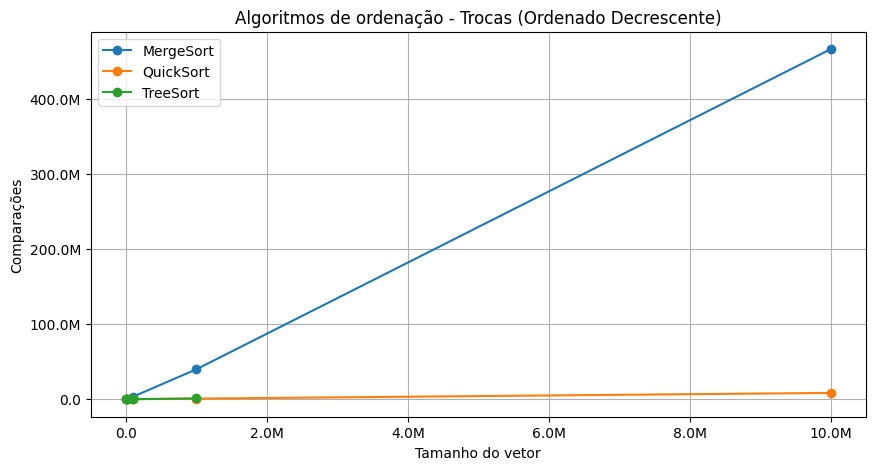

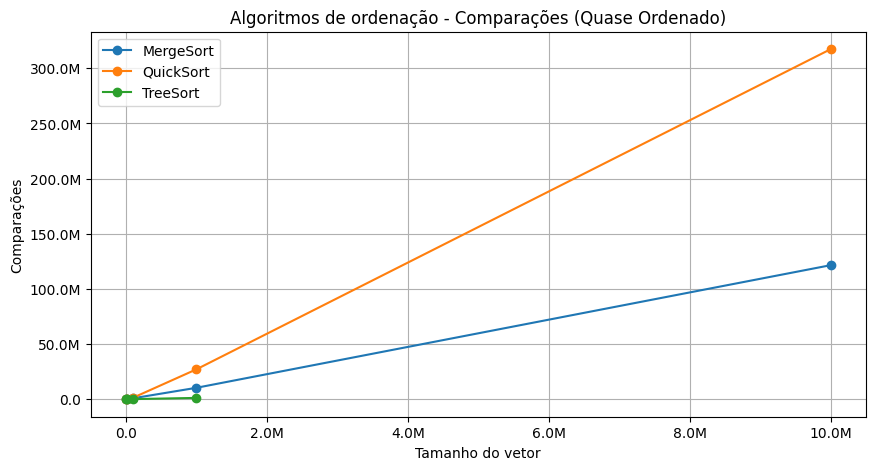

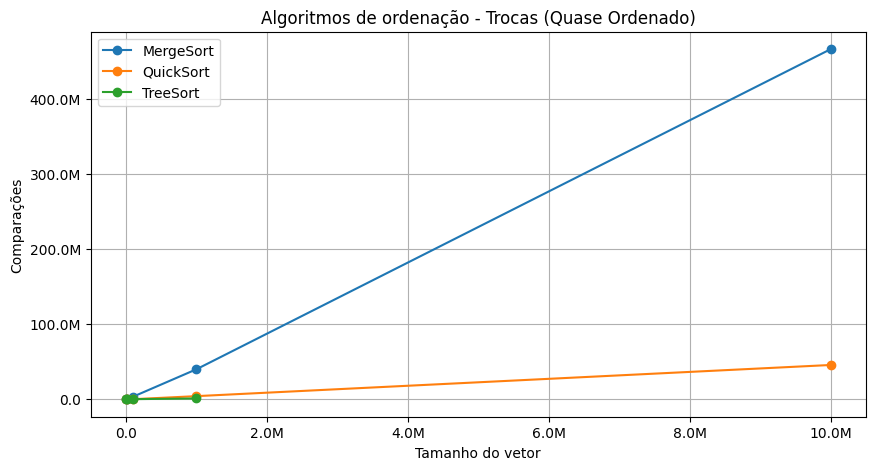

In [234]:
def plot_data(df, title, ylabel):

    plt.figure(figsize=(10, 5))
    plt.plot(df.index,df['MergeSort'], label='MergeSort', marker='o')
    plt.plot(df.index,df['QuickSort'], label='QuickSort', marker='o')
    plt.plot(df.index,df['TreeSort'], label='TreeSort', marker='o')
    plt.title(title)
    plt.xlabel('Tamanho do vetor')
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()

    # plt.xscale('log')
    
    ax = plt.gca()

    ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_number))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_number))
    


    plt.show()

plot_data(create_dataset('Aleatorio_Comparacoes'), 'Algoritmos de ordenação - Comparações (Aleatório)', 'Comparações')
plot_data(create_dataset('Aleatorio_Trocas'), 'Algoritmos de ordenação - Trocas (Aleatório)', 'Comparações')
plot_data(create_dataset('Crescente_Comparacoes'), 'Algoritmos de ordenação - Comparações (Ordenado Crescente)', 'Comparações')
plot_data(create_dataset('Crescente_Trocas'), 'Algoritmos de ordenação - Trocas (Ordenado Crescente)', 'Comparações')
plot_data(create_dataset('Decrescente_Comparacoes'), 'Algoritmos de ordenação - Comparações (Ordenado Decrescente)', 'Comparações')
plot_data(create_dataset('Decrescente_Trocas'), 'Algoritmos de ordenação - Trocas (Ordenado Decrescente)', 'Comparações')
plot_data(create_dataset('Quase_ordenado_Comparacoes'), 'Algoritmos de ordenação - Comparações (Quase Ordenado)', 'Comparações')
plot_data(create_dataset('Quase_ordenado_Trocas'), 'Algoritmos de ordenação - Trocas (Quase Ordenado)', 'Comparações')

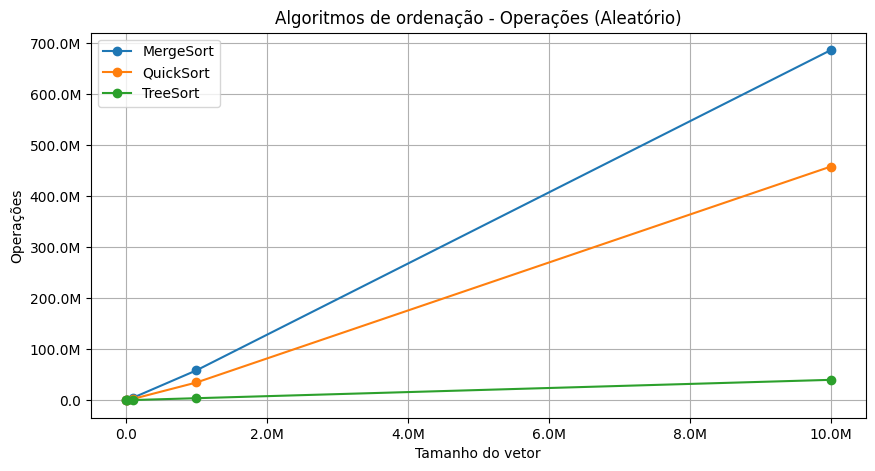

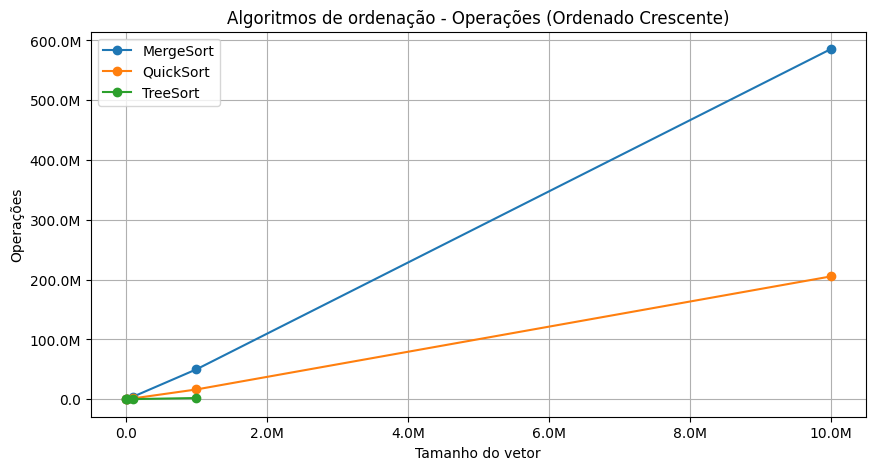

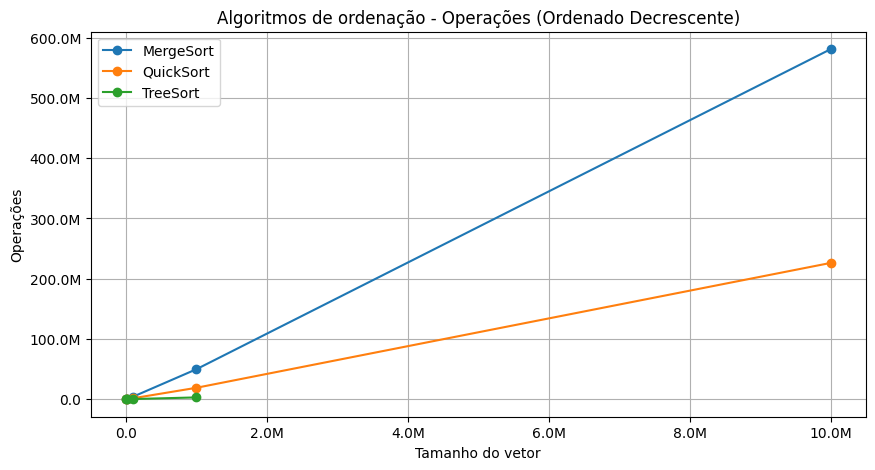

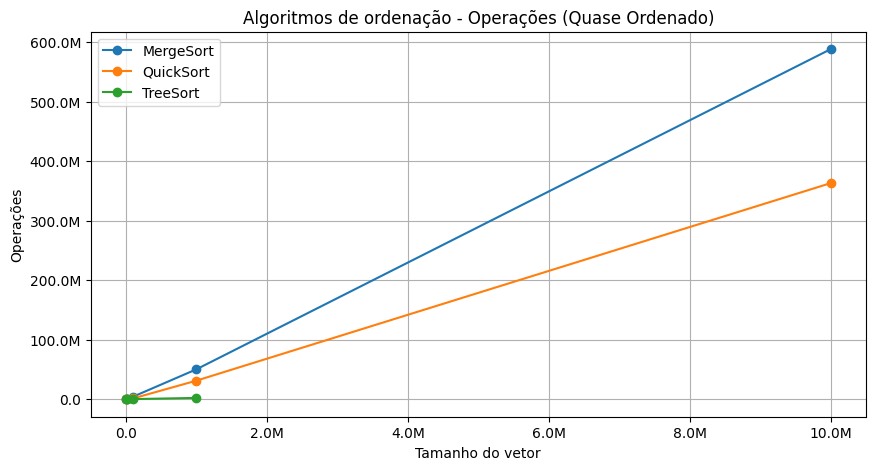

In [235]:
def create_dataset_sum(column1 : str, column2 : str):

    df = pd.DataFrame()
    df['Tamanho'] = bm_mergesort['Tamanho']
    df['MergeSort'] = bm_mergesort[column1] + bm_mergesort[column2]
    df['QuickSort'] = bm_quicksort[column1] + bm_quicksort[column2]
    df['TreeSort'] = bm_treesort[column1] + bm_treesort[column2]
    df = df.set_index('Tamanho')

    return df


plot_data(create_dataset_sum('Aleatorio_Trocas', 'Aleatorio_Comparacoes'), 'Algoritmos de ordenação - Operações (Aleatório)', 'Operações')
plot_data(create_dataset_sum('Crescente_Trocas', 'Crescente_Comparacoes'), 'Algoritmos de ordenação - Operações (Ordenado Crescente)', 'Operações')
plot_data(create_dataset_sum('Decrescente_Trocas', 'Decrescente_Comparacoes'), 'Algoritmos de ordenação - Operações (Ordenado Decrescente)', 'Operações')
plot_data(create_dataset_sum('Quase_ordenado_Trocas', 'Quase_ordenado_Comparacoes'), 'Algoritmos de ordenação - Operações (Quase Ordenado)', 'Operações')